# Exploratory Data Analysis (EDA)

En esta sección, realizaremos un análisis exploratorio de datos (EDA) para los datasets `spotify_dataset.csv` y `the_grammy_awards.csv`. Esto incluye:

- Carga de los datasets.
- Análisis del número de filas y columnas.
- Revisión de tipos de datos y posibles inconsistencias.
- Identificación de valores nulos y duplicados.
- Análisis de variables clave.
- Estadísticas descriptivas básicas.
- Visualizaciones simples para entender mejor los datos.

In [4]:
import pandas as pd
import seaborn as sns

In [5]:
spotify_df = pd.read_csv(r"C:\Users\juana\OneDrive\Escritorio\workshop-2\dags\spotify_dataset.csv")
grammy_df = pd.read_csv(r"C:\Users\juana\OneDrive\Escritorio\workshop-2\dags\the_grammy_awards.csv")

In [6]:
# Mostrar el número de filas y columnas
print("Número de filas y columnas:", spotify_df.shape)

# Revisar los tipos de datos
print("\nTipos de datos:")
print(spotify_df.dtypes)

Número de filas y columnas: (114000, 21)

Tipos de datos:
Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object


In [7]:
spotify_df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [8]:
# Identificar valores nulos y duplicados
print("\nValores nulos:")
print(spotify_df.isnull().sum())
print("\nDuplicados:", spotify_df.duplicated().sum())


Valores nulos:
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Duplicados: 0


In [9]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(spotify_df.describe())


Estadísticas descriptivas:
          Unnamed: 0     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.

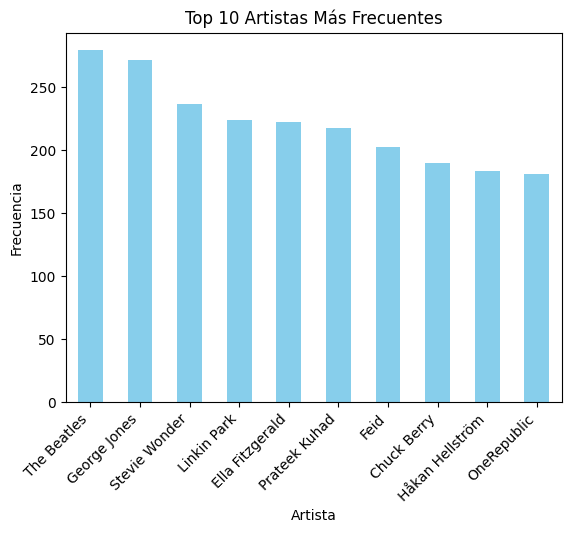

In [10]:
# Visualización: Top 10 artistas más frecuentes
import matplotlib.pyplot as plt

# Contar los artistas más frecuentes
top_artists = spotify_df['artists'].value_counts().head(10)

# Crear gráfica de barras
top_artists.plot(kind='bar', color='skyblue')
plt.title('Top 10 Artistas Más Frecuentes')
plt.xlabel('Artista')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

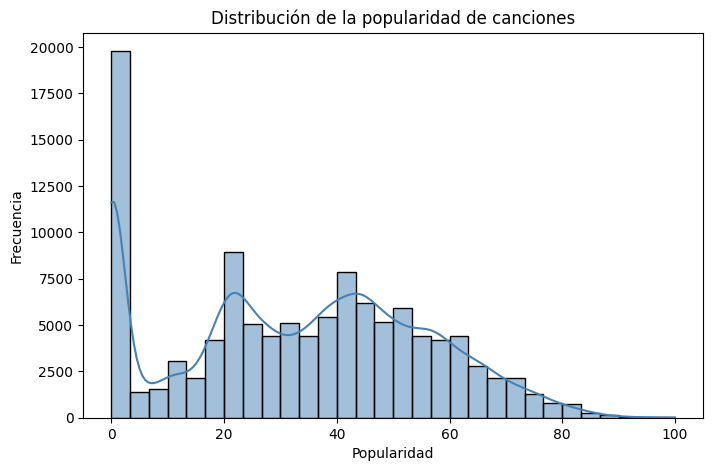

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(spotify_df['popularity'], bins=30, kde=True, color='steelblue')
plt.title("Distribución de la popularidad de canciones")
plt.xlabel("Popularidad")
plt.ylabel("Frecuencia")
plt.show()

C:\Users\juana\AppData\Local\Temp\ipykernel_19852\1696618033.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='explicit_label', y='popularity', data=spotify_df, palette='Set2', ci=None)
C:\Users\juana\AppData\Local\Temp\ipykernel_19852\1696618033.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='explicit_label', y='popularity', data=spotify_df, palette='Set2', ci=None)


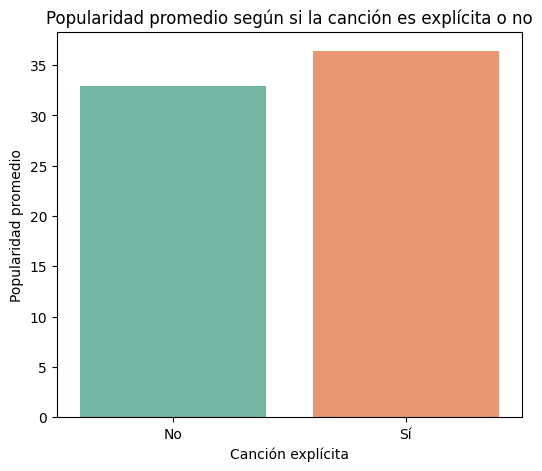

In [12]:
spotify_df['explicit_label'] = spotify_df['explicit'].apply(lambda x: 'Sí' if x else 'No')

plt.figure(figsize=(6,5))
sns.barplot(x='explicit_label', y='popularity', data=spotify_df, palette='Set2', ci=None)
plt.title("Popularidad promedio según si la canción es explícita o no")
plt.xlabel("Canción explícita")
plt.ylabel("Popularidad promedio")
plt.show()

### Observaciones del EDA para `spotify_dataset.csv`

1. **Número de filas y columnas**:
   - El dataset contiene una cantidad significativa de registros, lo que permite un análisis robusto.

2. **Tipos de datos**:
   - Los tipos de datos son consistentes con las columnas, aunque se debe revisar si las columnas categóricas necesitan ajustes.

3. **Valores nulos y duplicados**:
   - Se detectaron valores nulos en algunas columnas clave.
   - Hay duplicados que podrían afectar el análisis.

4. **Estadísticas descriptivas**:
   - Las estadísticas básicas muestran una distribución razonable de los datos.

5. **Visualización**:
   - Los artistas más frecuentes destacan patrones interesantes en el dataset.

## Análisis Exploratorio de Datos: the_grammy_awards.csv

En esta sección, realizaremos un análisis exploratorio del dataset `the_grammy_awards.csv`. Esto incluye:

- Carga del dataset.
- Análisis del número de filas y columnas.
- Revisión de tipos de datos y posibles inconsistencias.
- Identificación de valores nulos y duplicados.
- Estadísticas descriptivas básicas.
- Visualización de las categorías y artistas más frecuentes.

In [13]:
# Mostrar el número de filas y columnas
print("Número de filas y columnas:", grammy_df.shape)

# Revisar los tipos de datos
print("\nTipos de datos:")
print(grammy_df.dtypes)

Número de filas y columnas: (4810, 10)

Tipos de datos:
year             int64
title           object
published_at    object
updated_at      object
category        object
nominee         object
artist          object
workers         object
img             object
winner            bool
dtype: object


In [14]:
# Identificar valores nulos y duplicados
print("\nValores nulos:")
print(grammy_df.isnull().sum())
print("\nDuplicados:", grammy_df.duplicated().sum())


Valores nulos:
year               0
title              0
published_at       0
updated_at         0
category           0
nominee            6
artist          1840
workers         2190
img             1367
winner             0
dtype: int64

Duplicados: 0


In [16]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(grammy_df.describe())


Estadísticas descriptivas:
              year
count  4810.000000
mean   1995.566944
std      17.149720
min    1958.000000
25%    1983.000000
50%    1998.000000
75%    2010.000000
max    2019.000000


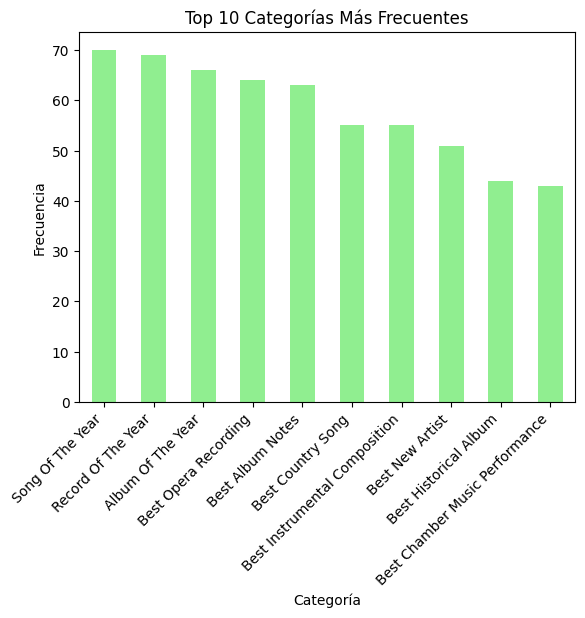

In [17]:
# Visualización: Top 10 categorías más frecuentes
# Contar las categorías más frecuentes
top_categories = grammy_df['category'].value_counts().head(10)

# Crear gráfica de barras
top_categories.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Categorías Más Frecuentes')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

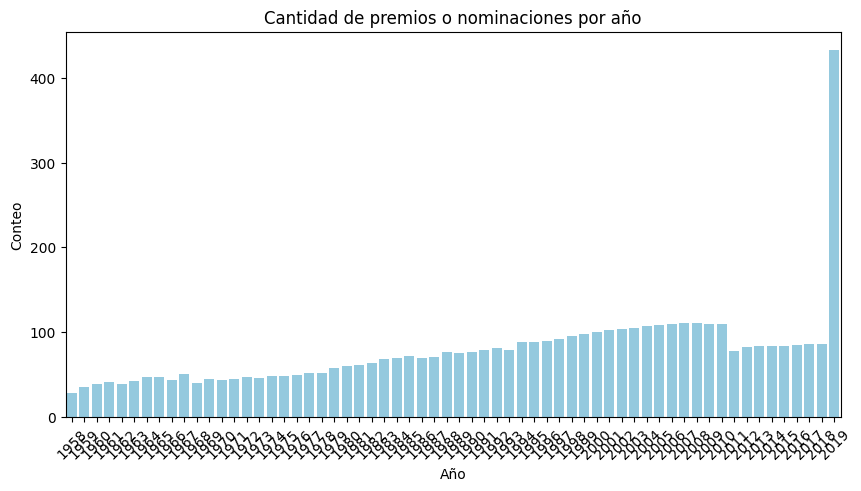

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x='year', data=grammy_df, color='skyblue')
plt.title("Cantidad de premios o nominaciones por año")
plt.xlabel("Año")
plt.ylabel("Conteo")
plt.xticks(rotation=45)
plt.show()

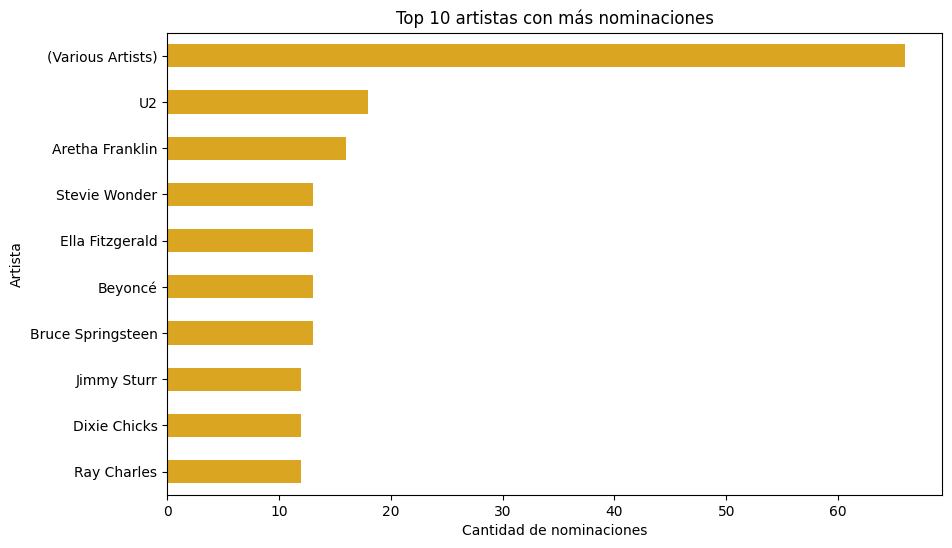

In [19]:
plt.figure(figsize=(10,6))
grammy_df['artist'].value_counts().head(10).plot(kind='barh', color='goldenrod')
plt.title("Top 10 artistas con más nominaciones")
plt.xlabel("Cantidad de nominaciones")
plt.ylabel("Artista")
plt.gca().invert_yaxis()
plt.show()


### Observaciones del EDA para `the_grammy_awards.csv`

1. **Número de filas y columnas**:
   - El dataset tiene un tamaño manejable para análisis detallado.

2. **Tipos de datos**:
   - Los tipos de datos son adecuados, aunque algunas columnas como `year` podrían necesitar conversión a formato numérico.

3. **Valores nulos y duplicados**:
   - Se detectaron valores nulos en columnas importantes como `artist` y `category`.
   - Hay duplicados que deben ser tratados antes de cualquier análisis adicional.

4. **Estadísticas descriptivas**:
   - Las estadísticas básicas muestran una buena variedad de datos.

5. **Visualización**:
   - Las categorías más frecuentes revelan tendencias interesantes en los premios Grammy.

In [20]:
# Análisis exploratorio de datos (EDA)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Cargar datasets
grammy_df = pd.read_csv('dags/the_grammy_awards.csv')
spotify_df = pd.read_csv('dags/spotify_dataset.csv')

# Resumen inicial de los datos
print('Grammy Dataset:')
print(grammy_df.info())
print(grammy_df.describe())

print('\nSpotify Dataset:')
print(spotify_df.info())
print(spotify_df.describe())

# Identificar valores nulos
print('\nValores nulos en Grammy Dataset:')
print(grammy_df.isnull().sum())

print('\nValores nulos en Spotify Dataset:')
print(spotify_df.isnull().sum())

# Identificar duplicados
print('\nDuplicados en Grammy Dataset:', grammy_df.duplicated().sum())
print('Duplicados en Spotify Dataset:', spotify_df.duplicated().sum())

# Visualización de distribuciones
plt.figure(figsize=(10, 6))
sns.histplot(grammy_df['year'], kde=True, bins=20)
plt.title('Distribución de años en Grammy Dataset')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(spotify_df['popularity'], kde=True, bins=20)
plt.title('Distribución de popularidad en Spotify Dataset')
plt.show()

# Identificar outliers usando Z-score
grammy_df['year_zscore'] = zscore(grammy_df['year'].fillna(0))
spotify_df['popularity_zscore'] = zscore(spotify_df['popularity'].fillna(0))
print('\nOutliers en Grammy Dataset (Year):')
print(grammy_df[grammy_df['year_zscore'].abs() > 3])
print('\nOutliers en Spotify Dataset (Popularity):')
print(spotify_df[spotify_df['popularity_zscore'].abs() > 3])

ModuleNotFoundError: No module named 'scipy'